#Imports and installs

In [ ]:
%%capture
!pip install sentence_transformers
!pip install scipy
!pip install nltk
!pip install catboost
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files

from sentence_transformers import SentenceTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from nltk.corpus import webtext
import nltk

In [ ]:
%%capture
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
#Function to split an evaluate a dataset and a model
def crossval_pipeline(df, model, label):

  #Split
  X = df.copy().drop(label, axis=1)
  y = df.copy()[label]

  #Cross validation
  scores_f1 = cross_val_score(model, X, y, cv=5, scoring="f1_macro")
  scores_acc = cross_val_score(model, X, y, cv=5, scoring="accuracy")

  #We get the accuracy
  return scores_f1.mean(),scores_acc.mean()

#Import dataset

In [ ]:
#We read all datasets
df_alt = pd.read_csv("alternative_music_data.csv")
df_blues = pd.read_csv("blues_music_data.csv")
df_hiphop = pd.read_csv("hiphop_music_data.csv")
df_indie = pd.read_csv("indie_alt_music_data.csv")
df_metal = pd.read_csv("metal_music_data.csv")
df_pop = pd.read_csv("pop_music_data.csv")
df_rock = pd.read_csv("rock_music_data.csv")

###Merge datasets 

In [ ]:
#We add up all datasets, shuffle them and restart the indexes
df_total = pd.concat([df_alt, df_blues, df_hiphop, df_indie, df_metal, df_pop, df_rock])
df_total = df_total.sample(frac=1)
df_total.index = [x for x in range(1, len(df_total.values)+1)]

In [ ]:
df_total.head()

In [ ]:
df_total.describe()

In [ ]:
#Export
df_total.to_csv('spotify_dataset.csv', encoding='utf-8-sig') 
files.download('spotify_dataset.csv')

###Import full dataset

In [ ]:
df_total = pd.read_csv("spotify_dataset.csv")
df_total

,Unnamed: 0,Artist Name,Track Name,Popularity,Genres,Playlist,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,1,Lords Of The Underground,Funky Child,48,"['alternative hip hop', 'conscious hip hop', '...",I Love My '90s Hip-Hop,0.859,0.635,10,-9.532,...,0.003460,0.1300,0.530,96.571,3UhwS81S9L7i2byZCrhSAv,spotify:track:3UhwS81S9L7i2byZCrhSAv,https://api.spotify.com/v1/tracks/3UhwS81S9L7i...,https://api.spotify.com/v1/audio-analysis/3Uhw...,271067,4
1,2,BROCKHAMPTON,BANKROLL (feat. A$AP Rocky & A$AP Ferg),73,"['boy band', 'hip hop', 'rap', 'underground hi...",Outliers,0.784,0.539,7,-8.938,...,0.000000,0.1060,0.576,149.059,3MK6OsCb4VJGdPxvXjW8Q9,spotify:track:3MK6OsCb4VJGdPxvXjW8Q9,https://api.spotify.com/v1/tracks/3MK6OsCb4VJG...,https://api.spotify.com/v1/audio-analysis/3MK6...,202560,4
2,3,Yuno,No Going Back,61,"['gamecore', 'jacksonville indie']",Underground Hits,0.714,0.708,2,-5.524,...,0.014100,0.0609,0.902,93.005,356aM3w6i5v1cltIzOnVTP,spotify:track:356aM3w6i5v1cltIzOnVTP,https://api.spotify.com/v1/tracks/356aM3w6i5v1...,https://api.spotify.com/v1/audio-analysis/356a...,208200,4
3,4,The Cars,Drive - 2017 Remaster,68,"['album rock', 'art rock', 'classic rock', 'fo...",80s Soft Rock,0.261,0.703,6,-7.871,...,0.000780,0.1020,0.405,83.495,2lFFiNm0XtgJ6wkdncTB4k,spotify:track:2lFFiNm0XtgJ6wkdncTB4k,https://api.spotify.com/v1/tracks/2lFFiNm0XtgJ...,https://api.spotify.com/v1/audio-analysis/2lFF...,234332,4
4,5,BTS,Dynamite,89,"['k-pop', 'k-pop boy group']",רדיו ישראל,0.746,0.765,6,-4.410,...,0.000000,0.0936,0.737,114.044,4saklk6nie3yiGePpBwUoc,spotify:track:4saklk6nie3yiGePpBwUoc,https://api.spotify.com/v1/tracks/4saklk6nie3y...,https://api.spotify.com/v1/audio-analysis/4sak...,199054,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26747,26748,The Recall,can you hear me,25,[],Butter,0.581,0.348,1,-13.138,...,0.067500,0.2630,0.135,112.123,02M384e2IGqWVmzjTlgqoC,spotify:track:02M384e2IGqWVmzjTlgqoC,https://api.spotify.com/v1/tracks/02M384e2IGqW...,https://api.spotify.com/v1/audio-analysis/02M3...,205714,4
26748,26749,Wooden Shjips,Staring At The Sun,49,"['freak folk', 'neo-psychedelic', 'nu gaze', '...",Shoegaze Classics,0.556,0.546,9,-13.215,...,0.845000,0.1150,0.427,91.887,0Ku9zP02uHYS4HH6jNLxV0,spotify:track:0Ku9zP02uHYS4HH6jNLxV0,https://api.spotify.com/v1/tracks/0Ku9zP02uHYS...,https://api.spotify.com/v1/audio-analysis/0Ku9...,447999,4
26749,26750,Biig Piig,American Beauty,0,"['alternative r&b', 'indie r&b', 'indie soul',...",All New Indie,0.643,0.622,7,-10.569,...,0.928000,0.1560,0.833,120.202,5sd5iSdc2bRXGirMiBcMDb,spotify:track:5sd5iSdc2bRXGirMiBcMDb,https://api.spotify.com/v1/tracks/5sd5iSdc2bRX...,https://api.spotify.com/v1/audio-analysis/5sd5...,172067,4
26750,26751,Thin Lizzy,Rosalie,44,"['album rock', 'art rock', 'blues rock', 'clas...",Deep Dive: 70s Rock,0.539,0.811,1,-11.224,...,0.000899,0.0644,0.553,133.829,09xbhnZy04ek1kpq3SgHYi,spotify:track:09xbhnZy04ek1kpq3SgHYi,https://api.spotify.com/v1/tracks/09xbhnZy04ek...,https://api.spotify.com/v1/audio-analysis/09xb...,176600,4


#Pre-processing

###Playlist selection (we only get the top playlists)

In [ ]:
QUANTILE = 0.9

#We group elements by playlist and make a dataframe with the number of songs
grouped = df_total.groupby("Playlist")
playlist = [[]]
for name, group in grouped:
    playlist.append([name,len(group)])
df_playlist = pd.DataFrame(playlist[1:])

#We find the threshold for which the quantile holds (basically select the top playlists with most songs)
threshold = df_playlist[1].quantile(QUANTILE)
print(f"We will get songs with more than {int(threshold)} songs")

#We get a list of the top playlists
df_playlist_top = df_playlist.loc[df_playlist[1] > threshold, :].sort_values(1)
playlist_top = df_playlist_top[0].tolist()
print(f"We will get {len(playlist_top)} playlists")

We will get songs with more than 99 songs
We will get 35 playlists


In [ ]:
#We clean the dataset, removing all elements in a playlist which is not a top playlist
df_clean = df_total[df_total["Playlist"].isin(playlist_top)]
df_clean.shape

(5713, 23)

###Feature Cleaning

In [ ]:
print(df_clean.columns)

Index(['Unnamed: 0', 'Artist Name', 'Track Name', 'Popularity', 'Genres',
       'Playlist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')


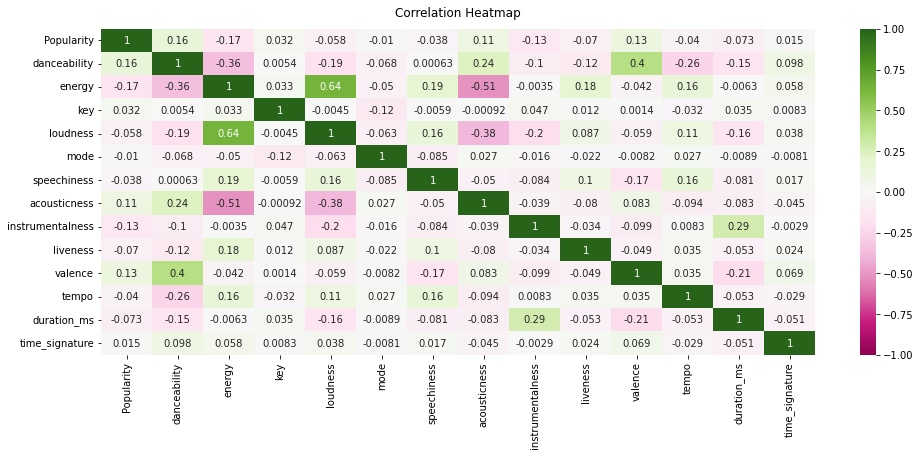

In [ ]:
#Correlation matrix 
df = df_clean.copy().drop(['Unnamed: 0'], axis = 1)
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1,  cmap="PiYG", annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
#We clean all non-relevant features
df_clean = df_clean[['Popularity', 'Genres', 'Playlist', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].copy()

In [ ]:
df_clean

,Popularity,Genres,Playlist,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
9,48,"['edinburgh indie', 'modern alternative rock',...",Indie Pop,0.609,0.895,2,-2.809,0.0375,0.000324,0.000438,0.0831,0.368,123.044
18,67,"['dance pop', 'lilith', 'new wave pop', 'perma...",Alternative 90s,0.586,0.777,5,-6.185,0.0303,0.000048,0.001470,0.0729,0.424,143.339
29,82,"['alternative rock', 'art rock', 'melancholia'...",Early Alternative,0.515,0.430,7,-9.935,0.0372,0.009700,0.000133,0.1290,0.104,91.844
30,51,"['art pop', 'baltimore indie', 'freak folk', '...",badass,0.682,0.561,2,-10.142,0.0598,0.423000,0.000166,0.0807,0.832,95.982
31,15,['new wave of thrash metal'],Thrashers,0.431,0.952,9,-5.100,0.0982,0.000012,0.668000,0.6590,0.474,109.753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26729,36,"['australian garage punk', 'indie punk']",Noisy,0.337,0.950,3,-2.218,0.0751,0.000943,0.000820,0.1040,0.474,86.179
26736,40,"['alternative dance', 'dance-punk', 'electro h...",Bloghouse,0.619,0.629,1,-4.109,0.3300,0.047300,0.227000,0.3140,0.262,123.003
26738,59,"['alternative dance', 'dance-punk', 'indie roc...",Alternative 00s,0.470,0.954,11,-3.631,0.1340,0.000159,0.004300,0.4050,0.412,170.100
26740,28,['swedish hard rock'],Hard Rock,0.527,0.971,5,-4.153,0.0486,0.000027,0.000037,0.0866,0.325,123.993


###Missing Values

In [ ]:
#We search for missing values
df_clean[df_clean.isnull().any(axis=1)]

,Popularity,Genres,Playlist,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo


###Normalization

In [ ]:
# Not necessary (not a distance-based model)

###Train, Test split

In [ ]:
train, test = train_test_split(df_clean, test_size=0.2)
train.index = [x for x in range(1, len(train.values)+1)]
test.index = [x for x in range(1, len(test.values)+1)]

print(train.shape)
print(test.shape)

(4570, 13)
(1143, 13)


#Genre Category Experiments

##No Genre

F1 score = 0.5672681280314146

Accuracy = 0.6150984682713347

###Dataset creation

In [ ]:
train_nogenre = train.copy().drop(['Genres'], axis = 1)

###Cross Validation

In [ ]:
clf = RandomForestClassifier(n_estimators=100)

f1, acc = crossval_pipeline(train_nogenre, clf, 'Playlist')

print(f"F1 score = {f1}\nAccuracy = {acc}")

F1 score = 0.5672681280314146
Accuracy = 0.6150984682713347


##One-Hot Encoding

F1 score = 0.5755155314648462

Accuracy = 0.6314300368372237



###Dataset creation

In [ ]:
#Function that removes adjectives ("hard rock" -> "rock")
def remove_adj(sentence):
    adjective_tags = ["JJ", "JJR", "JJS"]
    tokens = nltk.word_tokenize(sentence)
    tags = nltk.pos_tag(tokens)
    non_adj_tags = [word for word, pos in tags if pos not in adjective_tags]
    new_sentence = ' '.join(non_adj_tags)
    return new_sentence

In [ ]:
#We get a list of all the genres
genres = train["Genres"]
genres_list = [i.replace('\"','').replace('\'','').replace(']','').replace('[','').split(', ') for i in genres]
genres_list = [item for sublist in genres_list for item in sublist]
genres_list = [remove_adj(i) for i in genres_list]
genres_list = [remove_adj(i) for i in genres_list]
genres_list = list(set(genres_list))[1:]
print(genres_list)

['texas pop punk', 'j-poprock', 'essex indie', 'invasion', 'anti-folk', 'electra', 'newcastle indie', 'j-pop', 'outsider house', 'protopunk', 'jamgrass', 'chicago hardcore', 'nwobhm', 'kiwi rock', 'dream pop', 'gothabilly', 'metallic hardcore', 'bass house', 'nightrun', 'denver rap', 'oxford indie', 'brutal deathcore', 'brill building pop', 'gbvfi', 'jersey indie', 'dance rock', 'edmonton indie', 'la indie', 'metropopolis', 'funk metal', 'oc indie', 'eugene indie', 'fidget house', 'electrofox', 'southampton indie', 'country blues', 'soul', 'blackgaze', 'melbourne indie', 'bitpop', 'r & b', 'punk catala', 'brass band', 'boston metal', 'anthem emo', 'post-grunge', 'hardcore', 'art rock', 'piano rock', 'nyhc', 'chanson', 'chapman stick', 'freakbeat', 'emo punk', 'jazz house', 'rock alternatif francais', 'glam metal', 'swansea indie', 'musica catalana', 'us punk', 'euro house', 'post-rock', 'pub rock', 'lilith', 'microhouse', 'diy emo', 'tennessee metal', 'virginia metal', 'thai indie rock

In [ ]:
#We get a dictionary with all the repetitions of each genre in the dataset
genres_join = [i.replace('\"','').replace('\'','').replace(']','').replace('[','') for i in genres]
genres_join_str = ''.join(genres_join)
genres_count = {}

for i in genres_list:
  genres_count[i] = genres_join_str.count(i)

genres_count['pop']

2260

In [ ]:
#We get the top genres
def get_top_genres(dct, quant):
    values = np.array(list(dct.values()))
    threshold = np.percentile(values, quant)
    top_90_percentile = {k: v for k, v in dct.items() if v >= threshold}
    return top_90_percentile

top_genres = list(get_top_genres(genres_count, 97).keys())
top_genres = [i.split(' ')[0] for i in top_genres]
top_genres = list(set(top_genres))
top_genres

['dance',
 'blues',
 'punk',
 'psychedelic',
 'art',
 'indie',
 'pop',
 'psych',
 'alternative',
 'metalcore',
 'wave',
 'rock',
 'garage',
 'metal',
 'folk']

In [ ]:
def str_to_onehot(x):
  string = x.replace('\"','').replace('\'','').replace(']','').replace('[','')
  return [int(i in string) for i in top_genres]

train_onehot = train.copy()
train_onehot['Genres'] = train_onehot['Genres'].apply(str_to_onehot)
genre_onehot = pd.DataFrame(train_onehot['Genres'].tolist(),columns=top_genres)

train_onehot = pd.concat([train_onehot, genre_onehot], axis=1, join='inner')
train_onehot = train_onehot.drop('Genres', axis=1)
train_onehot

,Popularity,Playlist,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,...,indie,pop,psych,alternative,metalcore,wave,rock,garage,metal,folk
1,48,PopRox,0.677,0.870,11,-4.569,0.0356,0.199000,0.000000,0.3040,...,0,1,0,0,0,0,0,0,0,0
2,71,The New Alt,0.589,0.438,1,-7.431,0.0277,0.573000,0.000000,0.1280,...,0,0,0,0,0,0,0,0,1,0
3,29,Got Djent?,0.534,0.976,4,-6.742,0.1560,0.000582,0.000005,0.0615,...,0,0,0,0,0,0,0,0,0,0
4,31,pulp,0.404,0.514,0,-6.849,0.0310,0.001370,0.001770,0.2520,...,0,0,1,0,0,0,0,0,1,0
5,24,Progressive Metal,0.208,0.932,5,-6.872,0.0791,0.000002,0.828000,0.3650,...,0,1,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,58,No Cap,0.644,0.607,2,-8.066,0.4700,0.006850,0.000000,0.0786,...,1,0,0,0,0,0,1,0,0,0
4566,25,pulp,0.324,0.948,9,-4.609,0.0522,0.000009,0.561000,0.1650,...,0,1,0,1,0,0,1,0,0,0
4567,40,Shoegaze Classics,0.382,0.909,6,-7.644,0.0985,0.000109,0.107000,0.1720,...,0,1,0,0,0,0,0,0,0,0
4568,79,No Cap,0.847,0.629,9,-5.810,0.1020,0.031800,0.000000,0.1520,...,1,0,0,0,0,0,0,0,0,0


###Cross validation

In [ ]:
clf = RandomForestClassifier(n_estimators=100)

f1, acc = crossval_pipeline(train_onehot, clf, 'Playlist')

print(f"F1 score = {f1}\nAccuracy = {acc}")

F1 score = 0.5755155314648462
Accuracy = 0.6314300368372237


##Word Embedding + Dimensionality Reduction (PCA)
F1 score = 0.7010032241316049

Accuracy = 0.7260393873085339

###Dataset creation

In [ ]:
#We get a list with all the genres and use a word embedding for them
genres = train["Genres"]
genres_join = [i.replace('\"','').replace('\'','').replace(']','').replace('[','') for i in genres]

genres_emb = model.encode(genres_join)

In [ ]:
compNum = 20

pca = PCA(n_components=compNum)

#We get use a pca to reduce the number of features while maintaining the main characteristics of the embeddings
genres_pca = pca.fit_transform(genres_emb)
#We transform the result into a dataframe with the corresponding index and column names
train_genres_pca = pd.DataFrame(genres_pca,
                  columns=['Genre '+str(i) for i in range(compNum)],
                  index=[i+1 for i in range(genres_emb.shape[0])])

print(train_genres_pca.shape)
train_genres_pca

(4570, 20)


,Genre 0,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Genre 7,Genre 8,Genre 9,Genre 10,Genre 11,Genre 12,Genre 13,Genre 14,Genre 15,Genre 16,Genre 17,Genre 18,Genre 19
1,-1.544376,-2.009030,1.976760,-0.842530,-2.274020,0.196396,3.756433,-2.172590,2.773892,-0.600713,2.470510,-2.402772,0.574095,-2.158274,0.091948,-0.686367,-0.523618,-1.405810,0.953072,0.013129
2,2.448914,-1.993252,-0.386828,0.881901,0.253727,1.582805,3.881134,6.622022,-0.857040,-1.382068,0.193925,0.822624,0.096167,-3.246533,-2.335584,-0.620239,0.764840,-0.157192,3.072793,-1.566652
3,-3.864160,-3.992378,2.863300,-4.089283,0.760154,2.515227,0.261019,0.894494,1.989348,0.033271,-0.907849,1.918857,0.450242,0.155456,0.657101,-0.471580,0.623614,-1.015499,0.790222,-0.031432
4,0.591291,1.929328,1.083715,2.477078,-5.350878,0.417737,-0.496506,1.099111,-0.962116,0.583152,-2.522719,-0.915353,-0.760004,1.064962,-2.383204,0.544729,-3.416185,2.254988,-1.711550,-0.779848
5,2.465349,-0.550364,1.425701,3.742338,-0.826744,4.619488,1.950818,0.770595,-0.506203,-0.299232,0.512772,0.220678,1.404715,2.999534,-0.218807,2.081271,-0.739778,-0.008655,0.633243,0.476743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4566,-3.732389,-5.239918,4.072453,-1.861289,-2.971611,-1.186486,-0.999064,-2.058889,-3.077800,-1.533292,1.156242,-0.167215,-0.039100,-0.620937,-1.273417,0.750638,-0.676348,0.646821,-0.003240,-0.323473
4567,14.785677,1.597423,1.162810,-1.302901,0.857245,-0.650987,-0.447983,-0.236781,-0.209498,0.051688,0.145676,-0.378925,-0.032825,0.361509,-0.105662,-0.337944,0.118319,-0.151651,0.175950,0.051594
4568,14.785677,1.597423,1.162810,-1.302901,0.857245,-0.650987,-0.447983,-0.236781,-0.209498,0.051688,0.145676,-0.378925,-0.032825,0.361509,-0.105662,-0.337944,0.118319,-0.151651,0.175950,0.051594
4569,5.352204,-0.923918,-3.903682,5.704177,-0.369500,3.078247,-1.538878,-0.709225,-1.479137,-0.885065,-0.413672,0.434427,2.592569,-0.492488,3.975828,-0.747490,4.025803,3.936536,0.813104,-1.507323


In [ ]:
train_emb = train.copy()

train_emb = train_emb.drop('Genres', axis=1)
train_emb = pd.concat([train_genres_pca, train_emb], axis=1, join='inner')
train_emb

,Genre 0,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Genre 7,Genre 8,Genre 9,...,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1,-1.544376,-2.009030,1.976760,-0.842530,-2.274020,0.196396,3.756433,-2.172590,2.773892,-0.600713,...,0.441,0.964,7,-5.510,0.1190,0.000210,0.928000,0.4070,0.472,179.958
2,2.448914,-1.993252,-0.386828,0.881901,0.253727,1.582805,3.881134,6.622022,-0.857040,-1.382068,...,0.493,0.898,9,-3.321,0.0372,0.000219,0.000109,0.1730,0.536,126.054
3,-3.864160,-3.992378,2.863300,-4.089283,0.760154,2.515227,0.261019,0.894494,1.989348,0.033271,...,0.729,0.356,6,-13.743,0.0347,0.091600,0.090500,0.0520,0.392,95.026
4,0.591291,1.929328,1.083715,2.477078,-5.350878,0.417737,-0.496506,1.099111,-0.962116,0.583152,...,0.420,0.949,7,-6.214,0.1890,0.000181,0.004980,0.1010,0.171,77.064
5,2.465349,-0.550364,1.425701,3.742338,-0.826744,4.619488,1.950818,0.770595,-0.506203,-0.299232,...,0.847,0.946,1,-6.954,0.0538,0.001010,0.860000,0.0575,0.657,124.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4566,-3.732389,-5.239918,4.072453,-1.861289,-2.971611,-1.186486,-0.999064,-2.058889,-3.077800,-1.533292,...,0.470,0.969,6,-4.739,0.0968,0.000702,0.000000,0.3320,0.593,144.012
4567,14.785677,1.597423,1.162810,-1.302901,0.857245,-0.650987,-0.447983,-0.236781,-0.209498,0.051688,...,0.662,0.629,3,-7.879,0.0262,0.313000,0.032500,0.2190,0.503,111.026
4568,14.785677,1.597423,1.162810,-1.302901,0.857245,-0.650987,-0.447983,-0.236781,-0.209498,0.051688,...,0.709,0.685,2,-7.573,0.0281,0.035500,0.026800,0.0389,0.700,129.987
4569,5.352204,-0.923918,-3.903682,5.704177,-0.369500,3.078247,-1.538878,-0.709225,-1.479137,-0.885065,...,0.364,0.805,1,-5.015,0.1030,0.004680,0.000262,0.2620,0.467,134.948


###Import/Export

In [ ]:
#We download the new dataset
train_emb.to_csv('spotify_dataset_embedding.csv', encoding='utf-8-sig') 
files.download('spotify_dataset_embedding.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#We read the dataset
train_emb = pd.read_csv("spotify_dataset_embedding.csv")
train_emb

,Unnamed: 0,Genre 0,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Genre 7,Genre 8,...,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1,-0.763938,-0.449075,-3.723361,3.409011,-1.599624,-1.437667,-1.407998,0.978940,-2.156854,...,0.673,0.782,0,-5.456,0.0817,0.001660,0.000018,0.3410,0.883,135.082
1,2,14.751353,1.630383,0.749904,-1.587892,0.834673,-0.617341,-0.496141,-0.271700,-0.219654,...,0.674,0.831,2,-6.654,0.0650,0.031500,0.000000,0.1830,0.415,148.020
2,3,-4.182286,-0.728532,-2.612084,-2.656610,-0.793679,-0.247285,0.132143,0.256668,-0.302413,...,0.288,0.629,2,-3.252,0.0390,0.000223,0.000004,0.2620,0.267,170.150
3,4,-4.100106,6.320506,-1.828243,0.068304,-1.032907,-1.329213,-0.475774,-0.529065,1.580843,...,0.172,0.904,11,-4.831,0.0586,0.000054,0.229000,0.2670,0.302,135.149
4,5,14.751353,1.630383,0.749814,-1.587902,0.834620,-0.617347,-0.496139,-0.271683,-0.219632,...,0.242,0.948,5,-6.003,0.0660,0.000048,0.000951,0.2150,0.601,147.049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,4566,-1.144020,-6.276187,1.688363,-3.723262,-2.385324,3.290835,0.071472,0.777559,1.732906,...,0.560,0.825,2,-6.711,0.0347,0.000785,0.002460,0.0892,0.740,142.669
4566,4567,6.323883,-3.510956,-3.811048,3.707671,-0.300124,-0.076642,-0.634960,-0.929343,1.981332,...,0.556,0.885,10,-5.917,0.0397,0.002830,0.013700,0.1440,0.556,137.969
4567,4568,-4.858420,7.858621,-0.643052,-0.128676,1.366031,2.182054,-1.195041,-0.476614,1.506672,...,0.335,0.931,9,-4.488,0.1880,0.000112,0.001360,0.3150,0.206,84.024
4568,4569,-5.147317,8.067497,2.444281,1.823542,-1.412303,1.798049,-2.565745,-1.023903,-1.920909,...,0.279,0.963,2,-5.753,0.0747,0.000007,0.224000,0.5610,0.179,181.947


###Cross Validation

In [ ]:
clf = RandomForestClassifier(n_estimators=100)

f1, acc = crossval_pipeline(train_emb, clf, 'Playlist')

print(f"F1 score = {f1}\nAccuracy = {acc}")

F1 score = 0.7010032241316049
Accuracy = 0.7260393873085339


#Model Experiments

##Random Forest
F1 score = 0.7064029062277722

Accuracy = 0.7291028446389497

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=100)

f1, acc = crossval_pipeline(train_emb, clf, 'Playlist')

print(f"F1 score = {f1}\nAccuracy = {acc}")

F1 score = 0.7064029062277722
Accuracy = 0.7291028446389497


##XGBoost
F1 score = 0.6347417412393619

Accuracy = 0.6448577680525165

In [ ]:
X = train_emb.copy().drop('Playlist', axis=1)
y = train_emb.copy()['Playlist']

clf_XGB = XGBClassifier()
clf_XGB.fit(X, y)

f1, acc = crossval_pipeline(train_emb, clf_XGB, 'Playlist')

print(f"F1 score = {f1}\nAccuracy = {acc}")

F1 score = 0.6347417412393619
Accuracy = 0.6448577680525165


##CatBoost
F1 score = 0.6378492311375684

Accuracy = 0.6522975929978119

In [ ]:
X = train_emb.copy().drop('Playlist', axis=1)
y = train_emb.copy()['Playlist']

clf_catboost = CatBoostClassifier(iterations=100)
clf_catboost.fit(X, y)

f1, acc = crossval_pipeline(train_emb, clf_catboost, 'Playlist')

print(f"F1 score = {f1}\nAccuracy = {acc}")


Learning rate set to 0.5
0:	learn: 2.9907767	total: 251ms	remaining: 24.9s
1:	learn: 2.6788453	total: 439ms	remaining: 21.5s
2:	learn: 2.4074308	total: 642ms	remaining: 20.7s
3:	learn: 2.1698927	total: 835ms	remaining: 20s
4:	learn: 2.0086891	total: 1.04s	remaining: 19.8s
5:	learn: 1.8923252	total: 1.24s	remaining: 19.4s
6:	learn: 1.7731909	total: 1.44s	remaining: 19.1s
7:	learn: 1.6778259	total: 1.63s	remaining: 18.8s
8:	learn: 1.6046550	total: 1.83s	remaining: 18.5s
9:	learn: 1.5401647	total: 2.03s	remaining: 18.3s
10:	learn: 1.4717986	total: 2.24s	remaining: 18.1s
11:	learn: 1.4072645	total: 2.44s	remaining: 17.9s
12:	learn: 1.3642348	total: 2.65s	remaining: 17.7s
13:	learn: 1.3303749	total: 2.83s	remaining: 17.4s
14:	learn: 1.2761011	total: 3.02s	remaining: 17.1s
15:	learn: 1.2146030	total: 3.21s	remaining: 16.8s
16:	learn: 1.1661892	total: 3.41s	remaining: 16.7s
17:	learn: 1.1306098	total: 3.6s	remaining: 16.4s
18:	learn: 1.1022842	total: 3.8s	remaining: 16.2s
19:	learn: 1.0619843

##Gradient Boosting
F1 score = 0.43001308738921906

Accuracy = 0.4218818380743983

In [ ]:
X = train_emb.copy().drop('Playlist', axis=1)
y = train_emb.copy()['Playlist']

clf_gradboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)

f1 = cross_val_score(clf_gradboost, X, y, cv=5, scoring="f1_macro").mean()
acc = cross_val_score(clf_gradboost, X, y, cv=5, scoring="accuracy").mean()

print(f"F1 score = {f1}\nAccuracy = {acc}")

F1 score = 0.43001308738921906
Accuracy = 0.4218818380743983


#Hyperparameter Experiments
Best parameters:  
- max_depth: None
- min_samples_leaf: 2
- min_samples_split: 5
- n_estimators: 100

Best score:  0.7306345733041575

In [ ]:
from sklearn.model_selection import GridSearchCV

X = train_emb.copy().drop('Playlist', axis=1)
y = train_emb.copy()['Playlist']

param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

clf = RandomForestClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=5)

grid_search.fit(X, y)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best score:  0.7306345733041575


Final Model
- BERT genre Encoding
- RandomForest
  - max_depth: None
  - min_samples_leaf: 2
  - min_samples_split: 5
  - n_estimators: 100

#Final Test

##Test Dataset Creation

In [ ]:
#We get a list with all the genres and use a word embedding for them
genres = test["Genres"]
test_genres_join = [i.replace('\"','').replace('\'','').replace(']','').replace('[','') for i in genres]

test_genres_emb = model.encode(test_genres_join)



compNum = 20

pca = PCA(n_components=compNum)

#We get use a pca to reduce the number of features while maintaining the main characteristics of the embeddings
test_genres_pca = pca.fit_transform(test_genres_emb)
#We transform the result into a dataframe with the corresponding index and column names
test_genres_pca = pd.DataFrame(test_genres_pca,
                  columns=['Genre '+str(i) for i in range(compNum)],
                  index=[i+1 for i in range(test_genres_emb.shape[0])])
test_genres_pca



test_emb = test.copy()

test_emb = test_emb.drop('Genres', axis=1)
test_emb = pd.concat([test_genres_pca, test_emb], axis=1, join='inner')
test_emb

,Genre 0,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Genre 7,Genre 8,Genre 9,...,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1,-3.987016,-3.331628,4.641275,-0.861194,4.712630,2.252447,2.066852,-0.960845,-1.069573,-0.078493,...,0.361,0.910,9,-7.914,0.0943,0.033800,0.648000,0.1220,0.305,108.168
2,14.637568,1.848828,0.773187,-1.893307,0.711716,0.258483,-0.779005,-0.293555,-0.178559,0.074966,...,0.396,0.770,9,-4.728,0.0600,0.018400,0.000000,0.1200,0.412,177.542
3,-3.049005,-7.494677,4.264670,-1.161013,-1.800808,-2.670530,-0.821765,-0.148877,-1.223752,2.324748,...,0.729,0.672,2,-4.815,0.0351,0.003530,0.000071,0.2750,0.663,115.023
4,-2.843256,-0.851132,1.567175,2.465573,-0.238383,0.918699,-0.143426,1.500041,2.313802,-2.975640,...,0.580,0.963,11,-5.918,0.0388,0.031100,0.849000,0.3960,0.814,170.593
5,0.631306,-2.658499,1.183575,6.501954,-0.154775,4.475955,-1.510643,2.375424,-0.977852,-1.111072,...,0.558,0.876,6,-5.625,0.0288,0.024400,0.293000,0.0971,0.448,141.995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,0.300255,-1.552240,-8.188762,-1.061500,-1.189052,2.436940,2.412149,-1.089345,-2.342016,1.641261,...,0.460,0.906,1,-8.201,0.1500,0.000030,0.034800,0.1700,0.566,161.055
1140,14.637568,1.848830,0.773187,-1.893306,0.711713,0.258487,-0.779006,-0.293555,-0.178562,0.074966,...,0.745,0.572,11,-7.570,0.0657,0.005780,0.857000,0.6670,0.580,126.040
1141,-2.901449,-5.572584,1.352319,-4.408451,-1.091631,-2.800639,1.827348,1.231104,0.644040,0.406585,...,0.573,0.304,0,-14.310,0.0309,0.332000,0.000001,0.1110,0.256,102.686
1142,-0.036652,-5.178149,1.309570,0.051296,-1.164906,-3.694880,-2.952796,1.755104,0.055630,0.795643,...,0.854,0.671,7,-7.158,0.0543,0.019000,0.383000,0.1050,0.631,107.994


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

X_train = train_emb.copy().drop("Playlist", axis=1)
y_train = train_emb.copy()["Playlist"]
print(f"{X_train.shape}, {y_train.shape}")

X_test = test_emb.copy().drop("Playlist", axis=1)
y_test = test_emb.copy()["Playlist"]
print(f"{X_test.shape}, {y_test.shape}")

clf = RandomForestClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100).fit(X_train, y_train)
#clf.score(X_test, y_test)

y_pred_test = clf.predict(X_test)

(4570, 31), (4570,)
(1143, 31), (1143,)


In [ ]:
print(classification_report(y_test, y_pred_test))

                       precision    recall  f1-score   support

                Altar       0.74      0.94      0.83        36
      Alternative 00s       0.34      0.55      0.42        20
      Alternative 10s       0.50      0.41      0.45        27
      Alternative 60s       0.91      0.48      0.62        42
      Alternative 70s       0.46      0.46      0.46        28
      Alternative 80s       0.54      0.59      0.57        22
      Alternative 90s       0.34      0.69      0.46        16
    Alternative Beats       0.80      0.42      0.55        38
          Bedroom Pop       0.76      0.65      0.70        43
            Bloghouse       0.84      0.70      0.76        30
   Blues & Roots Rock       0.52      0.89      0.66        27
            Deathcore       0.40      0.67      0.50        21
Deep Dive - 90s Metal       0.41      0.41      0.41        22
    Early Alternative       0.41      0.38      0.39        24
          Full Volume       0.00      0.00      0.00  

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


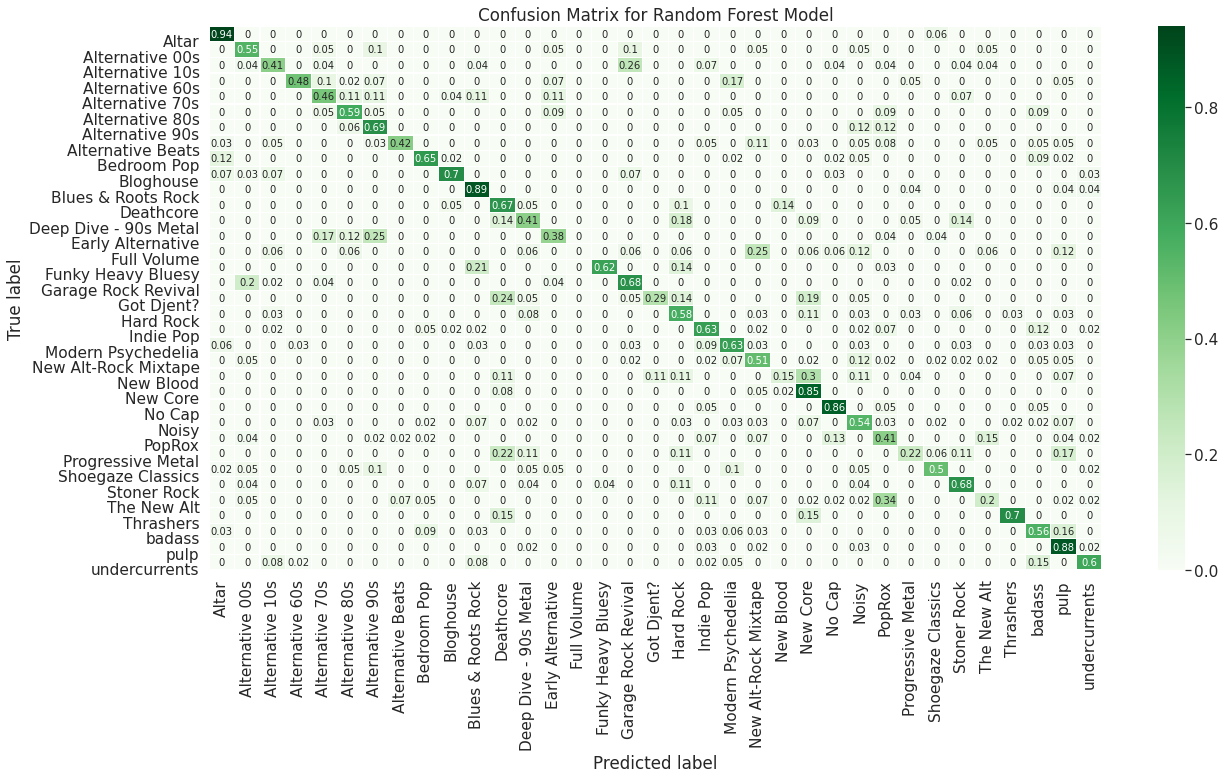

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = np.around(matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis], decimals=2)

# Build the plot
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Altar', 'Alternative 00s', 'Alternative 10s', 'Alternative 60s',
       'Alternative 70s', 'Alternative 80s', 'Alternative 90s',
       'Alternative Beats', 'Bedroom Pop', 'Bloghouse',
       'Blues & Roots Rock', 'Deathcore', 'Deep Dive - 90s Metal',
       'Early Alternative', 'Full Volume', 'Funky Heavy Bluesy',
       'Garage Rock Revival', 'Got Djent?', 'Hard Rock', 'Indie Pop',
       'Modern Psychedelia', 'New Alt-Rock Mixtape', 'New Blood',
       'New Core', 'No Cap', 'Noisy', 'PopRox', 'Progressive Metal',
       'Shoegaze Classics', 'Stoner Rock', 'The New Alt', 'Thrashers',
       'badass', 'pulp', 'undercurrents']
tick_marks = np.arange(len(class_names)) +0.5
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()